# Data Analysis and Data Science
## Putting it all together 

By: Caroline Labelle
<br>For: BIM6065-C

<br>
Date: July 8th, 2024

<hr style="border:1px solid black"> </hr>

In [ ]:
### Student Name: Emma Teszner

Complete the following exercises and push your notebook on Github: submit your Github handle on StudiUM.

In a terminal : 

1. Go in the same directory as your notebook: `cd path_to_your_notebook/`
2. Commit the change made to your notebook: `git commit -am "add_your_personalized_note"`
3. Push your commit on Github: `git push origin main`

Go to Github and double check that the pushed Notebook is the version you want to hand in.

In [138]:
### Import sklearn
import sklearn.decomposition, sklearn.cluster
from sklearn.cluster import KMeans

### Import scipy
import scipy as sp

### Import pandas, numpy, seaborn and matplotlib.pyplot
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [139]:
sns.set(rc={'figure.figsize':(4, 2)})
sns.set_theme(context="notebook", style="white", palette="Paired")

# Breast Cancer Subtypes Analysis [50 pts]

You are given a gene expression dataset of $N$ breast cancer patients with their clinical subtype. You wish to know if you can assess the clinical subtypes based on the gene expression. To do so you will be using various methods presented through out the class.

## Import the data [10 pts]

Your dataset concist of three files: 
1. `genes_id.txt`
2. `patient_subtype.txt`
3. `patient_expression.txt`. 

Import the various files and build your dataset daframe. You should have for each patient her/his gene expression profil and clinical subtypes. Use the gene IDs as identifier for the columns or row names (you choose how to build your dataframe).

### Import the files individually [3 pts]

In [140]:
gene_id = pd.read_csv("/u/teznerem/genes_id.txt", header=None, sep = " ")

#names =["Gene IDs"]

patient_subtype = pd.read_csv("/u/teznerem/patient_subtype.txt", header=None, sep = " ")

#names =["Patient Subtype"]

patient_expression = pd.read_csv("/u/teznerem/patient_expression.txt", header=None, sep = " ")

#names =["Patient Expression"])

### How many patient are you considering? [1 pt]

In [141]:
len(patient_subtype)

645

### How many genes are you considering? [1 pt]

In [142]:
len(gene_id)

47

### Combine the data from all three files into one dataframe [5 pts]
You can use one of the dataframe as the 'main' one, and then rename its columns and add a new column.

**Show a preview/overview of your dataframe**

In [143]:
#column names should be each gene id but in the matrix the columns should be gene expression 
#each row should be a patient
#extra column for gene subtype 

data = patient_expression
data.columns = gene_id[0]
data.loc[:,"Clinical_subtypes"] = patient_subtype[0]

data.head()

,ENSG00000011426.9,ENSG00000054598.6,ENSG00000062038.12,ENSG00000077152.8,ENSG00000082175.13,ENSG00000089685.13,ENSG00000091831.20,ENSG00000092621.10,ENSG00000094804.8,ENSG00000099953.8,...,ENSG00000171848.12,ENSG00000173890.15,ENSG00000174371.15,ENSG00000175063.15,ENSG00000176890.14,ENSG00000186081.10,ENSG00000186847.5,ENSG00000186868.14,ENSG00000261857.5,Clinical_subtypes
0,1.326515,3.475678,2.374959,3.409941,0.014148,3.235387,0.094595,4.488874,2.023978,3.996567,...,3.163366,1.751804,1.727270,4.541346,3.437507,5.678637,7.451924,0.598057,2.860720,Basal
1,1.885133,2.752910,3.770004,3.822052,0.051402,3.001023,0.241303,3.680198,1.820556,1.344271,...,2.339897,0.949565,1.967062,4.167635,3.288760,5.370061,2.870596,0.102755,3.075090,Basal
2,3.246316,4.423018,3.700385,4.369893,0.155187,3.752491,0.102125,3.779098,2.218593,1.927426,...,3.647681,1.063245,2.876544,4.498677,2.722251,3.125330,1.928449,0.374845,2.531836,Basal
3,2.161512,2.314358,3.562899,3.786747,0.039245,4.227823,0.493791,4.124650,2.202475,2.317170,...,3.071066,0.577870,2.554480,4.879861,3.597988,5.953152,3.761062,0.528845,1.604472,Basal
4,2.795468,1.876752,0.658127,2.581386,0.014486,2.688765,0.432283,2.655957,1.872897,0.924654,...,2.893713,0.272402,2.119050,3.571224,2.554718,0.189085,0.000000,0.199501,0.041927,Basal


## Explore the dataset [15 pts]

### How many subtypes are you considering? [1 pts]

In [144]:
print("Nb. of subtype:", data.loc[:, "Clinical_subtypes"].nunique())

Nb. of subtype: 5


### How many patients are associtated to each subtype? [2 pts]

In [145]:
data.loc[:, "Clinical_subtypes"].unique()

array(['Basal', 'LumA', 'LumB', 'Her2', 'Normal'], dtype=object)

In [146]:
data.groupby("Clinical_subtypes").count()

,ENSG00000011426.9,ENSG00000054598.6,ENSG00000062038.12,ENSG00000077152.8,ENSG00000082175.13,ENSG00000089685.13,ENSG00000091831.20,ENSG00000092621.10,ENSG00000094804.8,ENSG00000099953.8,...,ENSG00000171791.11,ENSG00000171848.12,ENSG00000173890.15,ENSG00000174371.15,ENSG00000175063.15,ENSG00000176890.14,ENSG00000186081.10,ENSG00000186847.5,ENSG00000186868.14,ENSG00000261857.5
Clinical_subtypes,,,,,,,,,,,,,,,,,,,,,
Basal,191,191,191,191,191,191,191,191,191,191,...,191,191,191,191,191,191,191,191,191,191
Her2,82,82,82,82,82,82,82,82,82,82,...,82,82,82,82,82,82,82,82,82,82
LumA,179,179,179,179,179,179,179,179,179,179,...,179,179,179,179,179,179,179,179,179,179
LumB,165,165,165,165,165,165,165,165,165,165,...,165,165,165,165,165,165,165,165,165,165
Normal,28,28,28,28,28,28,28,28,28,28,...,28,28,28,28,28,28,28,28,28,28


### Generate a graph showing the distribution of the average expression of each gene [5 pts]

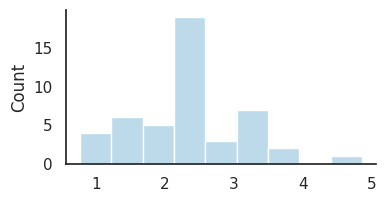

In [147]:
avg_expression = data.loc[:, data.columns.values[0:47]].mean()
sns.histplot(avg_expression)
sns.despine()

### What are the two genes with the largest standard deviation for all patient? [2 pts]
To answer this question, you can use the `df.std()` and `df.sort_values()`. You can look into the doc for more informations on these two functions.
1. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.std.html
2. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html#pandas.DataFrame.sort_values

In [148]:
expression_genes = data.loc[:, data.columns.values[0:47]]
std_devs = expression_genes.std()
std_devs

0
ENSG00000011426.9     0.781086
ENSG00000054598.6     1.254415
ENSG00000062038.12    1.246204
ENSG00000077152.8     0.744226
ENSG00000082175.13    1.332091
ENSG00000089685.13    0.854562
ENSG00000091831.20    1.798359
ENSG00000092621.10    1.145830
ENSG00000094804.8     0.715625
ENSG00000099953.8     1.197679
ENSG00000101057.14    1.080362
ENSG00000104332.10    1.788465
ENSG00000105173.12    0.858695
ENSG00000106605.9     0.672515
ENSG00000107262.15    0.581383
ENSG00000115648.12    1.445019
ENSG00000117399.12    0.930666
ENSG00000117724.11    0.743877
ENSG00000128422.14    1.880477
ENSG00000129514.5     1.752245
ENSG00000133627.16    0.511039
ENSG00000134057.13    0.626176
ENSG00000135679.20    0.489934
ENSG00000136997.13    0.908470
ENSG00000138180.14    0.721745
ENSG00000141424.11    1.352087
ENSG00000141736.12    1.110351
ENSG00000141738.12    0.962185
ENSG00000142945.11    0.759882
ENSG00000146648.14    0.950554
ENSG00000148773.11    0.738464
ENSG00000151715.6     0.961420
ENSG00

In [149]:
sorted_std_devs = std_devs.sort_values(ascending=False)
sorted_std_devs

0
ENSG00000186081.10    1.899352
ENSG00000128422.14    1.880477
ENSG00000186847.5     1.878563
ENSG00000091831.20    1.798359
ENSG00000104332.10    1.788465
ENSG00000129514.5     1.752245
ENSG00000171428.12    1.673947
ENSG00000115648.12    1.445019
ENSG00000141424.11    1.352087
ENSG00000082175.13    1.332091
ENSG00000054598.6     1.254415
ENSG00000062038.12    1.246204
ENSG00000099953.8     1.197679
ENSG00000261857.5     1.152220
ENSG00000092621.10    1.145830
ENSG00000186868.14    1.115846
ENSG00000141736.12    1.110351
ENSG00000101057.14    1.080362
ENSG00000171791.11    0.977252
ENSG00000141738.12    0.962185
ENSG00000151715.6     0.961420
ENSG00000146648.14    0.950554
ENSG00000175063.15    0.949751
ENSG00000160867.13    0.932651
ENSG00000117399.12    0.930666
ENSG00000136997.13    0.908470
ENSG00000173890.15    0.878594
ENSG00000105173.12    0.858695
ENSG00000089685.13    0.854562
ENSG00000171604.10    0.809525
ENSG00000165304.6     0.781922
ENSG00000011426.9     0.781086
ENSG00

In [150]:
top_two_genes = sorted_std_devs.head(2)
top_two_genes

0
ENSG00000186081.10    1.899352
ENSG00000128422.14    1.880477
dtype: float64

### Compare the expression of these two genes: are they correlated based on tumor subtypes? [5 pts]
The two genes to consider are **ENSG00000186081.10** and **ENSG00000128422.14**.

To answer this question: 
1. Make a figure showing the correlation between the two genes by clinical subtypes,
2. Calculate a correlation coefficient for each comparison and,
3. Briefly interpret your results (make sure your interpretation is consistent with the correlation coefficient used).

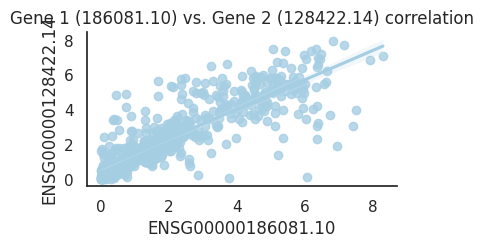

In [151]:
p = sns.regplot(data, x="ENSG00000186081.10", y="ENSG00000128422.14")
p.set_title("Gene 1 (186081.10) vs. Gene 2 (128422.14) correlation")
sns.despine()

In [191]:
gene1 = data['ENSG00000186081.10']
gene2 = data['ENSG00000128422.14']
ccf = np.corrcoef(gene1, gene2)
ccf

array([[1.        , 0.85216653],
       [0.85216653, 1.        ]])

In [192]:
#Interpret results !!!!!!!!!!!

## Clustering [25 pts]
You are wondering if the M genes considered by your dataset are enough to cluster the N patients by their cancer subtype. To answer this question, you first want to apply a dimensionality reduction algorithm to your dataset. You then want to apply a clustering alogirthme to the reduced components, and compare the clustering labels to the clinical subtype of each patient.

### Apply a PCA Dimensionality reduction to your gene expression dataset [4 pts]

Once you selected the numerical gene expression, scale the value and initiate a PCA object. You want to reduce your set of features to **25 components**.

In [228]:
subset_PCA = data.iloc[:, 0:47]
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(subset_PCA)
subset_scaled = scaler.transform(subset_PCA)
pca = sklearn.decomposition.PCA(n_components=25)
pca.fit(subset_scaled)

PCA(n_components=25)

### What percentage of the variance of the dataset is explained by the two first component? [2 pt]

In [229]:
explained_variance_ratio = pca.explained_variance_ratio_
variance_explained_by_first_two = explained_variance_ratio[0] + explained_variance_ratio[1]
print("Percentage of the variance of the dataset explained by the two first components: ")
print(variance_explained_by_first_two * 100)

Percentage of the variance of the dataset explained by the two first components: 
57.54637194875689


### Apply the PCA onto your gene expression data and create a DataFrame with the PCs and the clinical patient subtypes [4 pts]
**Show a preview/overview of your dataframe**

In [230]:
pca_data = pca.fit_transform(subset_scaled)
pc_columns = ["PC" + str(i+1) for i in range(25)]
pca_df = pd.DataFrame(pca_data, columns = pc_columns)
pca_df['Clinical_subtypes'] = data['Clinical_subtypes']
print(pca_df.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  5.445487  2.428348  0.994181  3.234351  0.581775  0.503669 -1.314576   
1  5.413304  2.726559 -0.916842  0.937050 -1.994252  0.303562 -0.123579   
2  8.407711  0.419360 -2.059230 -0.792823 -1.954798 -0.389237  0.139329   
3  7.328172  0.176822 -0.737810  2.308405 -1.091921 -0.587628 -0.933543   
4  3.819484  2.102397 -2.357337 -6.491174 -0.157028 -1.487336 -1.577103   

        PC8       PC9      PC10  ...      PC17      PC18      PC19      PC20  \
0  1.770997 -1.192583 -0.811812  ... -1.875858  0.426612  0.114464 -0.851402   
1 -0.860660 -0.201094  0.128108  ...  0.501419 -0.084159  0.432827  0.036273   
2  0.366723 -0.093978  0.865002  ... -0.397783  0.131195 -0.107449  0.023024   
3  0.759118 -0.101877 -0.162309  ... -0.469685 -0.240287  0.302134 -0.237978   
4  1.635241 -0.133013 -0.757461  ... -0.835880  0.055895 -2.013600  0.320591   

       PC21      PC22      PC23      PC24      PC25  Clinical_subtyp

In [231]:
pca_reduce = pca.fit_transform(subset_scaled)
data_reduce = pd.DataFrame(pca_reduce)
data_reduce.loc[:, "Clinical_substypes"] = data.Clinical_subtypes
data_reduce.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,Clinical_substypes
0,5.445487,2.428348,0.994181,3.234351,0.581775,0.503669,-1.314576,1.770997,-1.192583,-0.811812,...,-1.875858,0.426612,0.114464,-0.851402,1.109125,0.041479,0.916238,0.283359,1.411175,Basal
1,5.413304,2.726559,-0.916842,0.937050,-1.994252,0.303562,-0.123579,-0.860660,-0.201094,0.128108,...,0.501419,-0.084159,0.432827,0.036273,-0.020044,-0.211830,-0.521534,0.355593,-0.205031,Basal
2,8.407711,0.419360,-2.059230,-0.792823,-1.954798,-0.389237,0.139329,0.366723,-0.093978,0.865002,...,-0.397783,0.131195,-0.107449,0.023024,-0.212187,0.308241,-0.325319,0.193784,0.278587,Basal
3,7.328172,0.176822,-0.737810,2.308405,-1.091921,-0.587628,-0.933543,0.759118,-0.101877,-0.162309,...,-0.469685,-0.240287,0.302134,-0.237978,0.268315,-0.380987,-0.429954,0.023508,0.039688,Basal
4,3.819484,2.102397,-2.357337,-6.491174,-0.157028,-1.487336,-1.577103,1.635241,-0.133013,-0.757461,...,-0.835880,0.055895,-2.013600,0.320591,1.559804,0.849584,-0.104835,0.746528,0.459466,Basal


### Plot a figure showing the two first PCs and color the samples by their clinical subtype [3 pts]
Do you think the k-means algorithm will be able to accurately cluster patients based on their clinical subtype? Why?

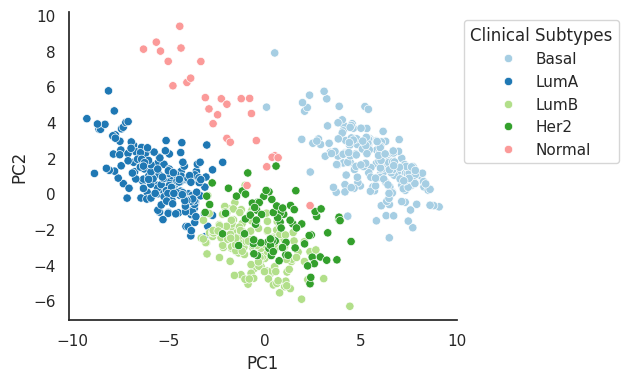

In [239]:
plt.figure(figsize=(5, 4))
sns.scatterplot(x='PC1', y='PC2', hue='Clinical_subtypes', data=pca_df, palette="Paired")
#p.set_title("First two PCs coloured by Clinical Subtypes")
plt.legend(title="Clinical Subtypes", bbox_to_anchor=(1, 1), loc='upper left')
sns.despine()

### Apply the K-means algorithm to your reduced dataset [5 pts]
When applying the K-means, you should use all 25 PCs, generated by your PCA. Add the k-means labels to your reduced dataset.

In [233]:
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(pca_df.iloc[:, :-1])
pca_df['KMeans_labels'] = kmeans.labels_
print(pca_df.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  5.445487  2.428348  0.994181  3.234351  0.581775  0.503669 -1.314576   
1  5.413304  2.726559 -0.916842  0.937050 -1.994252  0.303562 -0.123579   
2  8.407711  0.419360 -2.059230 -0.792823 -1.954798 -0.389237  0.139329   
3  7.328172  0.176822 -0.737810  2.308405 -1.091921 -0.587628 -0.933543   
4  3.819484  2.102397 -2.357337 -6.491174 -0.157028 -1.487336 -1.577103   

        PC8       PC9      PC10  ...      PC18      PC19      PC20      PC21  \
0  1.770997 -1.192583 -0.811812  ...  0.426612  0.114464 -0.851402  1.109125   
1 -0.860660 -0.201094  0.128108  ... -0.084159  0.432827  0.036273 -0.020044   
2  0.366723 -0.093978  0.865002  ...  0.131195 -0.107449  0.023024 -0.212187   
3  0.759118 -0.101877 -0.162309  ... -0.240287  0.302134 -0.237978  0.268315   
4  1.635241 -0.133013 -0.757461  ...  0.055895 -2.013600  0.320591  1.559804   

       PC22      PC23      PC24      PC25  Clinical_subtypes  KMeans

In [234]:
data_reduce.loc[:, "Kmeans_labels"] = kmeans.labels_
data_reduce.head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,Clinical_substypes,Kmeans_labels
0,5.445487,2.428348,0.994181,3.234351,0.581775,0.503669,-1.314576,1.770997,-1.192583,-0.811812,...,0.426612,0.114464,-0.851402,1.109125,0.041479,0.916238,0.283359,1.411175,Basal,1
1,5.413304,2.726559,-0.916842,0.937050,-1.994252,0.303562,-0.123579,-0.860660,-0.201094,0.128108,...,-0.084159,0.432827,0.036273,-0.020044,-0.211830,-0.521534,0.355593,-0.205031,Basal,1
2,8.407711,0.419360,-2.059230,-0.792823,-1.954798,-0.389237,0.139329,0.366723,-0.093978,0.865002,...,0.131195,-0.107449,0.023024,-0.212187,0.308241,-0.325319,0.193784,0.278587,Basal,1
3,7.328172,0.176822,-0.737810,2.308405,-1.091921,-0.587628,-0.933543,0.759118,-0.101877,-0.162309,...,-0.240287,0.302134,-0.237978,0.268315,-0.380987,-0.429954,0.023508,0.039688,Basal,1
4,3.819484,2.102397,-2.357337,-6.491174,-0.157028,-1.487336,-1.577103,1.635241,-0.133013,-0.757461,...,0.055895,-2.013600,0.320591,1.559804,0.849584,-0.104835,0.746528,0.459466,Basal,1


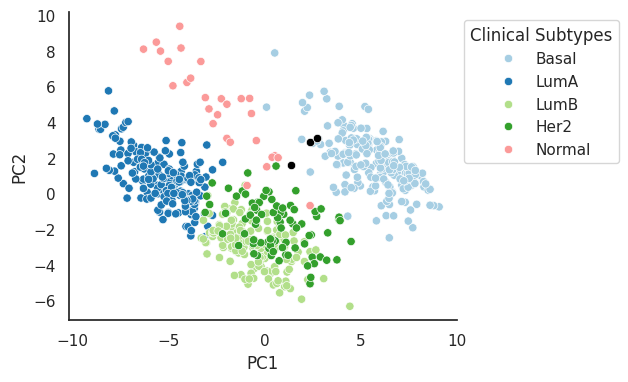

In [243]:
plt.figure(figsize=(5, 4))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Clinical_subtypes")
sns.scatterplot(x=cent_by_axes[0], y=cent_by_axes[5], color="black")
plt.legend(title="Clinical Subtypes", bbox_to_anchor=(1, 1), loc='upper left')
sns.despine()

### What value of k did you use and why? [2 pt]

In [225]:
"""

I used a value of 𝑘=5 for the K-means clustering algorithm. I chose this value of k because the dataset contains 5 known clinical subtypes. 
By setting 𝑘=5 I aimed to see if the clustering algorithm could accurately group the data points into clusters that correspond to 
these clinical subtypes.

"""

### Compare your k-means labels to the clinical substypes [5 pts]
You comparison can by qualitative and/or quantitative.

**Are you able to cluster patient by clinical substypes from your subset of gene expressions? Briefly describe and interpret your results.**